In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.svm import SVC

In [2]:
def generateSeparatableData(n):
    """
    产生线性可分的数据集
    """
    np.random.seed(2046)
    X = np.r_[np.random.randn(n, 2) - [1, 1], np.random.randn(n, 2) + [3, 3]]
    Y = [[0]] * n + [[1]] * n
    data = np.concatenate((Y, X), axis=1)
    data = pd.DataFrame(data, columns=["y", "x1", "x2"])
    return data

In [9]:
generateSeparatableData(2)

,y,x1,x2
0,0.0,-0.784934,-0.115833
1,0.0,-2.160885,-1.215616
2,1.0,4.160988,1.479918
3,1.0,2.963956,1.855861


In [5]:
def generateInseparatableData(n):
    """
    产生线性不可分的数据集
    """
    data = generateSeparatableData(n)
    inseparatable = [[1, -1, 1.5], [0, 3, 1]]
    inseparatable = pd.DataFrame(inseparatable, columns=["y", "x1", "x2"])
    data = data.append(inseparatable)
    return data

In [6]:
generateInseparatableData(2)

,y,x1,x2
0,0.0,-0.784934,-0.115833
1,0.0,-2.160885,-1.215616
2,1.0,4.160988,1.479918
3,1.0,2.963956,1.855861
0,1.0,-1.000000,1.500000
1,0.0,3.000000,1.000000


In [11]:
def trainModel(data):
    """
    训练SVM模型
    """
    # 将惩罚系数设为很大，使模型接近于线性可分时的模型
    model = SVC(C=1e4, kernel="linear")
    model.fit(data[["x1", "x2"]], data["y"])
    return model

In [12]:
def visualize(data, model=None):
    """
    将模型结果可视化
    """
    # 创建一个图形框
    fig = plt.figure(figsize=(6, 6), dpi=80)
    # 在图形框里画一幅图
    ax = fig.add_subplot(1, 1, 1)
    label1 = data[data["y"]>0]
    ax.scatter(label1[["x1"]], label1[["x2"]], marker="o")
    label0 = data[data["y"]==0]
    ax.scatter(label0[["x1"]], label0[["x2"]], marker="^", color="k")
    if model is not None:
        w = model.coef_
        a = -w[0][0] / w[0][1]
        xx = np.linspace(-3, 5)
        yy = a * xx - (model.intercept_) / w[0][1]
        yy_down = yy - 1 / w[0][1]
        yy_up = yy + 1 / w[0][1]
        ax.plot(xx, yy, "r")
        ax.plot(xx, yy_down, "r--")
        ax.plot(xx, yy_up, "r--")
    plt.show()

In [15]:
data = generateSeparatableData(20)
data1 = generateInseparatableData(20)

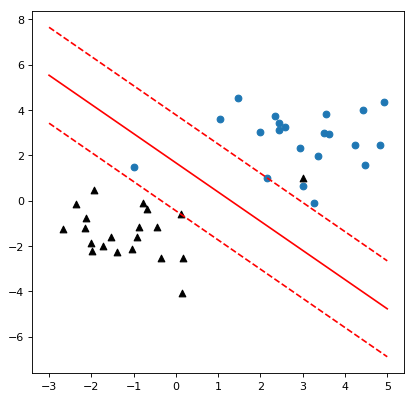

In [16]:
re = trainModel(data)
visualize(data1, re)